<a href="https://colab.research.google.com/github/anil-9393/global-temperature-time-series/blob/main/Topic_22_jan_26_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-Class Classification of Depression Subtypes Using Machine Learning and Imbalanced Data Handling**

# **Loading File and Dataset**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Mental Health Classification.csv'
df = pd.read_csv(file_path)



## **Dataset Description**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    1998 non-null   int64
 1   Age                       1998 non-null   int64
 2   Education_Level           1998 non-null   int64
 3   Employment_Status         1998 non-null   int64
 4   Depression_Type           1998 non-null   int64
 5   Symptoms                  1998 non-null   int64
 6   Low_Energy                1998 non-null   int64
 7   Low_SelfEsteem            1998 non-null   int64
 8   Search_Depression_Online  1998 non-null   int64
 9   Worsening_Depression      1998 non-null   int64
 10  Your overeating level     1998 non-null   int64
 11  How many times you eat    1998 non-null   int64
 12  SocialMedia_Hours         1998 non-null   int64
 13  SocialMedia_WhileEating   1998 non-null   int64
 14  Sleep_Hours               1998 non-null 

In [22]:
df.head()

,Gender,Age,Education_Level,Employment_Status,Depression_Type,Symptoms,Low_Energy,Low_SelfEsteem,Search_Depression_Online,Worsening_Depression,...,How many times you eat,SocialMedia_Hours,SocialMedia_WhileEating,Sleep_Hours,Nervous_Level,Depression_Score,Coping_Methods,Self_Harm,Mental_Health_Support,Suicide_Attempts
0,1,25,2,3,5,11,1,1,1,1,...,0,10,3,10,10,10,11,0,0,0
1,1,25,2,2,5,0,1,1,0,1,...,0,8,3,4,10,10,0,0,1,0
2,1,25,2,3,2,5,1,1,1,1,...,0,10,3,4,10,10,0,1,1,1
3,0,25,2,2,6,7,0,1,0,1,...,0,4,3,3,10,10,5,1,1,1
4,1,25,2,2,6,5,0,0,0,0,...,1,3,3,7,1,3,0,0,0,0


# **Exploratory Data Analysis**

## **Descriptive Statistical Analysis**

In [23]:
# Summary statistics for all columns
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Gender,Age,Education_Level,Employment_Status,Depression_Type,Symptoms,Low_Energy,Low_SelfEsteem,Search_Depression_Online,Worsening_Depression,...,How many times you eat,SocialMedia_Hours,SocialMedia_WhileEating,Sleep_Hours,Nervous_Level,Depression_Score,Coping_Methods,Self_Harm,Mental_Health_Support,Suicide_Attempts
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000
mean,0.514014,24.261762,1.869369,2.097097,5.673173,6.553053,0.709710,0.696196,0.386887,0.652152,...,0.204705,5.960961,2.063564,6.505506,5.702202,14.622623,5.920420,0.098098,0.224725,1.434434
std,0.499929,7.928578,0.472003,0.873915,2.935595,3.852428,0.485973,0.488522,0.487159,0.476407,...,0.403587,3.728180,0.992946,2.278048,2.504859,8.948343,4.092346,0.297522,0.417505,1.135513
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,2.000000,2.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,2.000000,5.000000,4.000000,7.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,25.000000,2.000000,2.000000,5.000000,5.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,6.000000,2.000000,7.000000,5.000000,14.000000,6.000000,0.000000,0.000000,1.000000
75%,1.000000,25.000000,2.000000,2.000000,9.000000,9.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,9.000000,3.000000,8.000000,8.000000,22.000000,9.000000,0.000000,0.000000,2.000000
max,1.000000,35.000000,3.000000,4.000000,11.000000,14.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,12.000000,3.000000,10.000000,10.000000,30.000000,13.000000,1.000000,1.000000,3.000000


## **Missing Values**
We checked for missing values in the dataset

In [24]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender                      0
Age                         0
Education_Level             0
Employment_Status           0
Depression_Type             0
Symptoms                    0
Low_Energy                  0
Low_SelfEsteem              0
Search_Depression_Online    0
Worsening_Depression        0
Your overeating level       0
How many times you eat      0
SocialMedia_Hours           0
SocialMedia_WhileEating     0
Sleep_Hours                 0
Nervous_Level               0
Depression_Score            0
Coping_Methods              0
Self_Harm                   0
Mental_Health_Support       0
Suicide_Attempts            0
dtype: int64


## **Correlation Analysis**
This generates a heatmap to see how variables (like Social Media hours or Sleep) relate to the Depression Score.

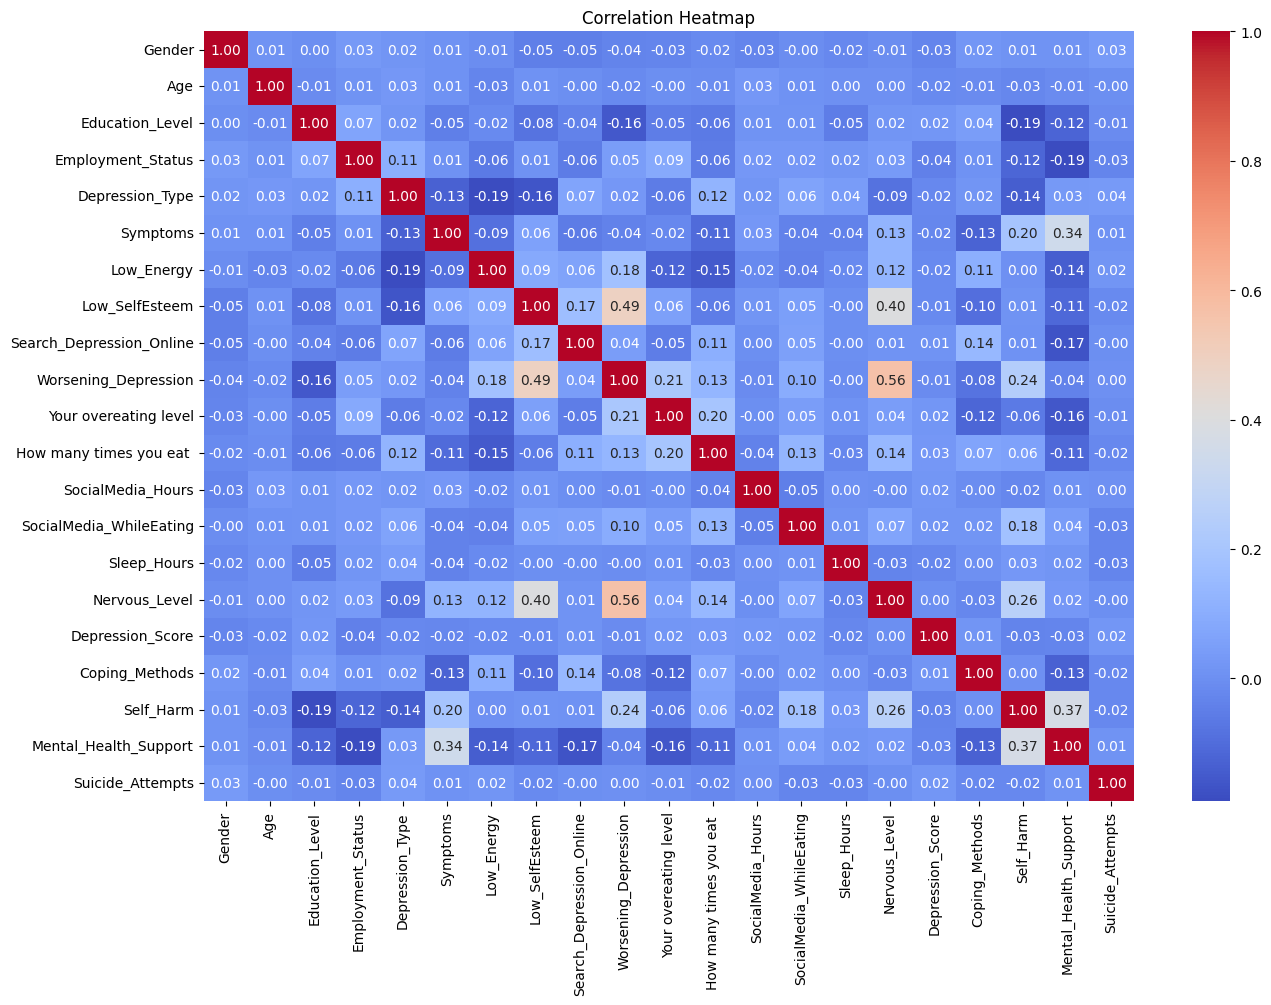

In [25]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')

## **Visualizing the Target Variable (Depression Score)**
This block examines the distribution of depression scores and how they vary by gender.

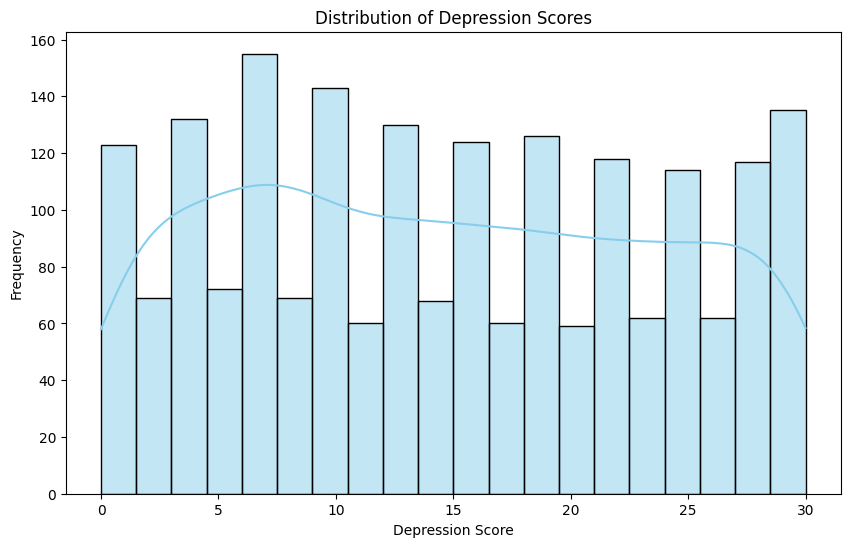

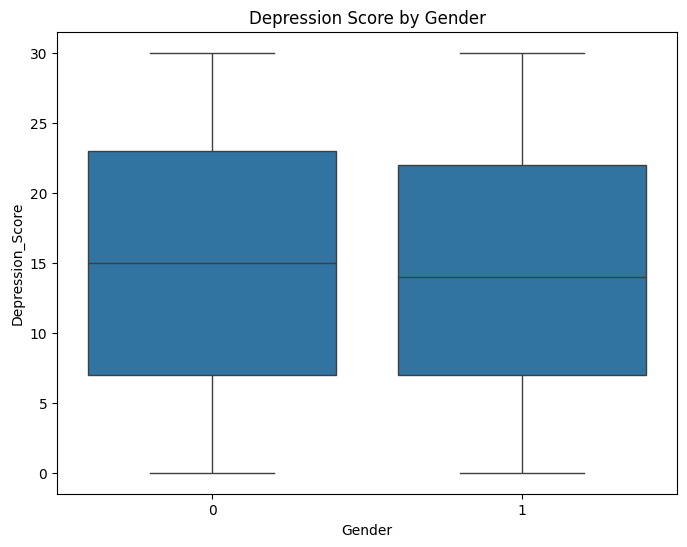

In [26]:
# Distribution of Depression Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Depression_Score'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.savefig('depression_score_distribution.png')

# Boxplot of Depression Score by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Depression_Score', data=df)
plt.title('Depression Score by Gender')
plt.savefig('depression_by_gender.png')

## **Categorical Analysis**
This block aggregates data to find which groups (by Employment or Education) have the highest scores.

In [27]:
# Mean Depression Score by Employment Status
print("Mean Depression Score by Employment Status:")
print(df.groupby('Employment_Status')['Depression_Score'].mean().sort_values())

# Mean Depression Score by Education Level
print("\nMean Depression Score by Education Level:")
print(df.groupby('Education_Level')['Depression_Score'].mean().sort_values())

# Frequency of Suicide Attempts and Self Harm
print("\nSuicide Attempts frequency:")
print(df['Suicide_Attempts'].value_counts().sort_index())

print("\nSelf Harm frequency (0=No, 1=Yes):")
print(df['Self_Harm'].value_counts())

Mean Depression Score by Employment Status:
Employment_Status
1    13.377049
3    13.881773
4    14.289017
2    14.660537
0    16.190476
Name: Depression_Score, dtype: float64

Mean Depression Score by Education Level:
Education_Level
0    13.454545
2    14.612571
1    14.985612
3    16.406250
Name: Depression_Score, dtype: float64

Suicide Attempts frequency:
Suicide_Attempts
0    559
1    495
2    461
3    483
Name: count, dtype: int64

Self Harm frequency (0=No, 1=Yes):
Self_Harm
0    1802
1     196
Name: count, dtype: int64
